In [1]:
import lightkurve as lk
#10963065
datalist = lk.search_lightcurvefile('10963065',cadence='short')
datalist

RemoteServiceError: A network-related or instance-specific error occurred while establishing a connection to SQL Server. The server was not found or was not accessible. Verify that the instance name is correct and that SQL Server is configured to allow remote connections. (provider: Named Pipes Provider, error: 40 - Could not open a connection to SQL Server)

In [17]:
data = datalist.download_all()

In [54]:
lc = data[6].PDCSAP_FLUX.normalize().remove_nans().remove_outliers()

In [55]:
for d in data[7:]:
    lc = lc.append(d.PDCSAP_FLUX.normalize().remove_nans().remove_outliers())

/usr/local/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


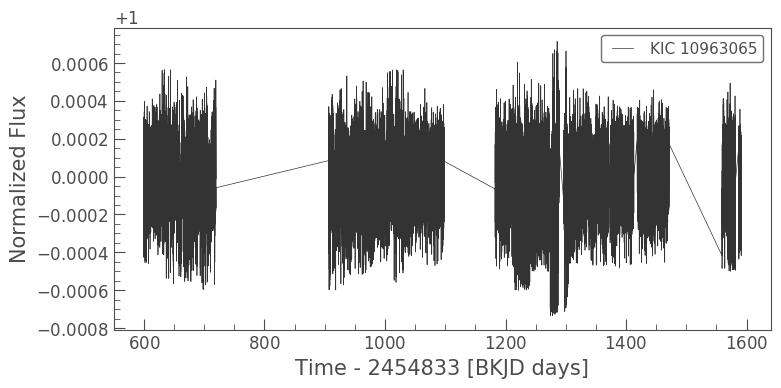

In [56]:
lc.plot()

In [59]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=1000, maximum_frequency=3000)

/usr/local/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


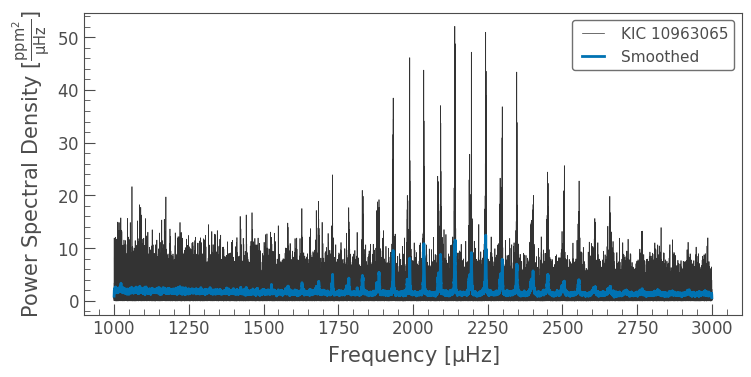

In [60]:
ax = pg.plot()
pg.smooth(filter_width=1.).plot(ax=ax, label='Smoothed', lw=2)

/usr/local/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


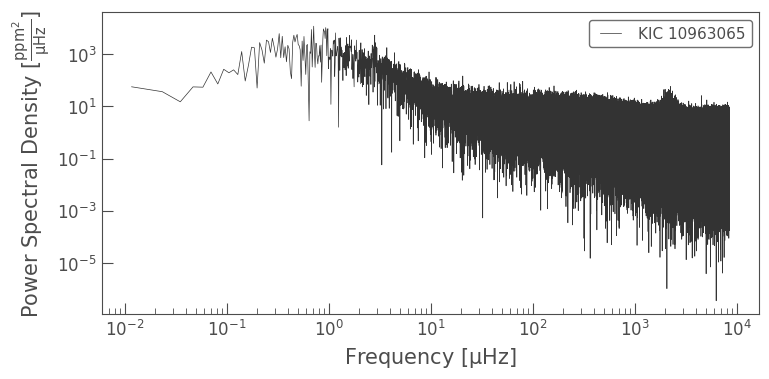

In [62]:
lc.to_periodogram(normalization='psd').plot(scale='log')

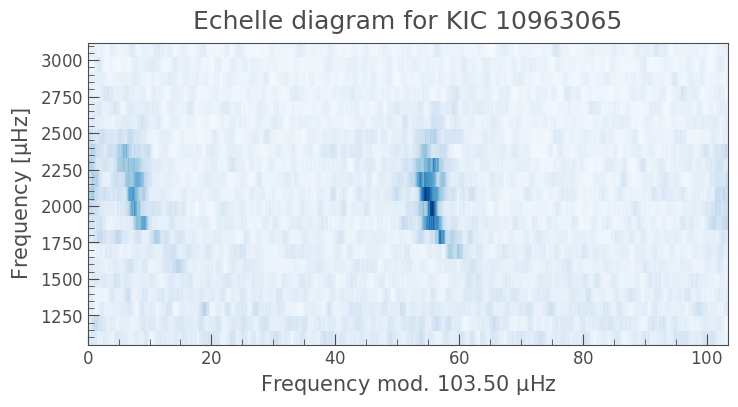

In [53]:
lc.to_periodogram(normalization='psd').smooth(filter_width=1.).plot_echelle(103.5, numax=2100)